In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install transformers torchvision torch


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 48.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 51.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 37.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 107.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [ ]:
import os
from PIL import Image
import torch
from torchvision import transforms
from transformers import BeitFeatureExtractor, BeitModel

# Load the BEiT feature extractor and model
feature_extractor = BeitFeatureExtractor.from_pretrained('microsoft/beit-base-patch16-224')
model = BeitModel.from_pretrained('microsoft/beit-base-patch16-224')

# Set model to evaluation mode
model.eval()

# Directory path
image_dir = "/content/drive/MyDrive/Autistic Children Emotions - Dr. Fatma M. Talaat/Train"

# Image preprocessing
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=feature_extractor.image_mean, std=feature_extractor.image_std)
])

# Function to extract features
def extract_features(image_path):
    image = Image.open(image_path).convert("RGB")
    pixel_values = feature_extractor(images=image, return_tensors="pt").pixel_values
    with torch.no_grad():
        outputs = model(pixel_values)
    last_hidden_state = outputs.last_hidden_state  # Shape: [1, 197, 768]
    cls_embedding = last_hidden_state[:, 0]         # [CLS] token embedding
    return cls_embedding.squeeze().numpy()

# Example: Extract features from all images in folder
features = {}
for root, _, files in os.walk(image_dir):
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):
            path = os.path.join(root, file)
            try:
                features[file] = extract_features(path)
                print(f"Extracted features for {file}")
            except Exception as e:
                print(f"Error processing {file}: {e}")

# Optional: Save features to disk
import pickle
with open("autistic_children_beit_features.pkl", "wb") as f:
    pickle.dump(features, f)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/276 [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/models/beit/feature_extraction_beit.py:28: FutureWarning: The class BeitFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use BeitImageProcessor instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/utils/deprecation.py:172: UserWarning: The following named arguments are not valid for `BeitFeatureExtractor.__init__` and were ignored: 'feature_extractor_type'
  return func(*args, **kwargs)


config.json:   0%|          | 0.00/69.9k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/350M [00:00<?, ?B/s]

Extracted features for 0004.jpg
Extracted features for 0015.jpg
Extracted features for 0075.jpg
Extracted features for 0028.jpg
Extracted features for 0036.jpg
Extracted features for 0087.jpg
Extracted features for 0077.jpg
Extracted features for 0006.jpg
Extracted features for 0046.jpg
Extracted features for 0008.jpg
Extracted features for 0098.jpg
Extracted features for 0052.jpg
Extracted features for 0042.jpg
Extracted features for 0045.jpg
Extracted features for 0005.jpg
Extracted features for 0058.jpg
Extracted features for 0071.jpg
Extracted features for 0081.jpg
Extracted features for 0029.jpg
Extracted features for 0361.jpg
Extracted features for 0613.jpg
Extracted features for 0602.jpg
Extracted features for 0805.jpg
Extracted features for 0166.jpg
Extracted features for 0943.jpg
Extracted features for 1245.jpg
Extracted features for 0615.jpg
Extracted features for 0641.jpg
Extracted features for 0118.jpg
Extracted features for 0193.jpg
Extracted features for 0402.jpg
Extracte

traing with VISION TRANSFORMERS

Classes: ['Natural', 'anger', 'fear', 'joy', 'sadness', 'surprise']


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ViT_B_16_Weights.IMAGENET1K_V1`. You can also use `weights=ViT_B_16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vit_b_16-c867db91.pth" to /root/.cache/torch/hub/checkpoints/vit_b_16-c867db91.pth
100%|██████████| 330M/330M [00:06<00:00, 53.3MB/s]


Epoch 1/10 | Loss: 1.3422 | Accuracy: 52.77%
Epoch 2/10 | Loss: 0.9875 | Accuracy: 65.30%
Epoch 3/10 | Loss: 0.7252 | Accuracy: 70.98%
Epoch 4/10 | Loss: 0.5435 | Accuracy: 77.04%
Epoch 5/10 | Loss: 0.4032 | Accuracy: 81.13%
Epoch 6/10 | Loss: 0.3399 | Accuracy: 80.47%
Epoch 7/10 | Loss: 0.3196 | Accuracy: 82.85%
Epoch 8/10 | Loss: 0.3161 | Accuracy: 81.00%
Epoch 9/10 | Loss: 0.2720 | Accuracy: 81.40%
Epoch 10/10 | Loss: 0.2667 | Accuracy: 82.06%

Classification Report:
              precision    recall  f1-score   support

     Natural       1.00      1.00      1.00        48
       anger       0.50      0.01      0.03        67
        fear       0.69      0.30      0.42        30
         joy       1.00      1.00      1.00       350
     sadness       0.65      0.96      0.78       200
    surprise       0.96      0.73      0.83        63

    accuracy                           0.85       758
   macro avg       0.80      0.67      0.68       758
weighted avg       0.85      0.85    

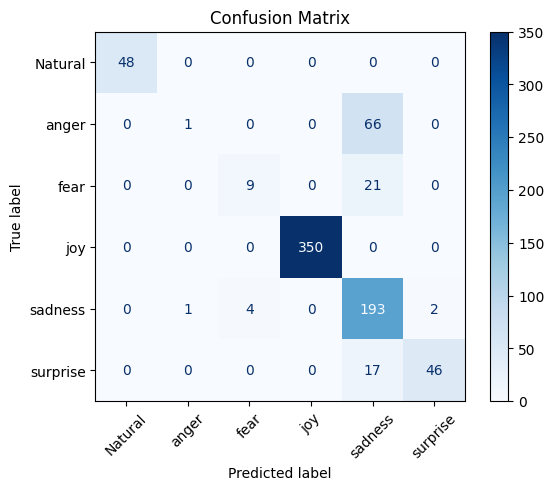

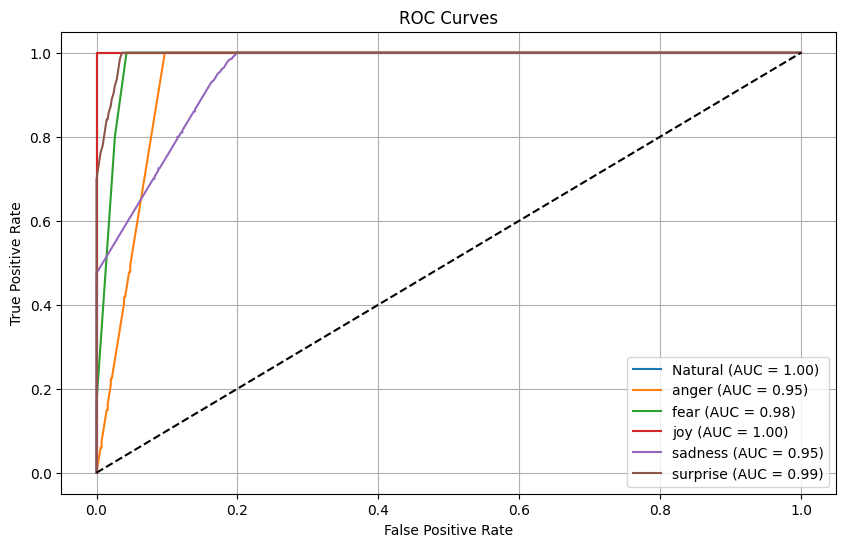

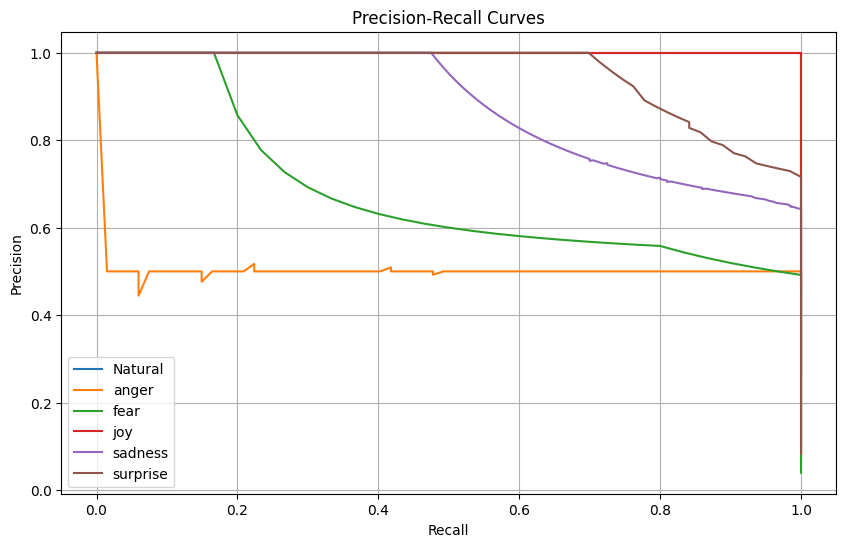

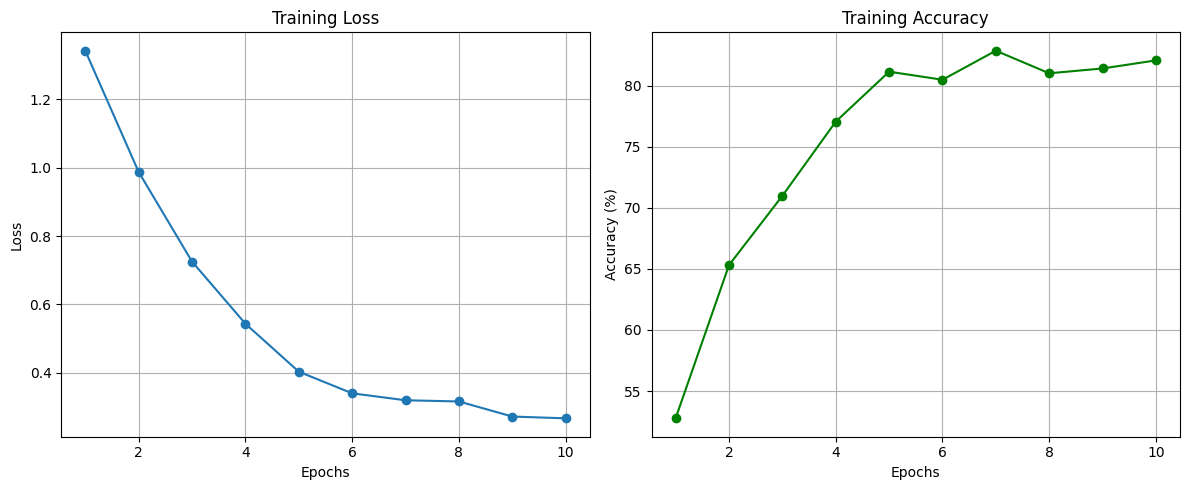

In [ ]:
# 📌 Import libraries
import os
import torch
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt
import numpy as np

# 📌 Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 📌 Dataset path
data_dir = "/content/drive/MyDrive/Autistic Children Emotions - Dr. Fatma M. Talaat/Train"

# 📌 Image transformations for ViT
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

# 📌 Load dataset
train_dataset = datasets.ImageFolder(root=data_dir, transform=transform)
class_names = train_dataset.classes
print("Classes:", class_names)

# 📌 Standard DataLoader (no balancing)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# 📌 Load pretrained Vision Transformer and modify the classification head
model = models.vit_b_16(pretrained=True)
in_features = model.heads[0].in_features
model.heads = nn.Sequential(nn.Linear(in_features, len(class_names)))  # Replace classifier
model = model.to(device)

# 📌 Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# 📌 Training loop
epochs = 10
train_loss_history = []
train_acc_history = []

for epoch in range(epochs):
    model.train()
    running_loss = 0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    epoch_loss = running_loss / len(train_loader)
    epoch_acc = 100 * correct / total
    train_loss_history.append(epoch_loss)
    train_acc_history.append(epoch_acc)

    print(f"Epoch {epoch+1}/{epochs} | Loss: {epoch_loss:.4f} | Accuracy: {epoch_acc:.2f}%")

# 📌 Evaluation and Predictions
model.eval()
all_preds = []
all_labels = []
all_probs = []

with torch.no_grad():
    for images, labels in train_loader:
        images = images.to(device)
        outputs = model(images)
        probs = torch.softmax(outputs, dim=1)

        _, preds = torch.max(probs, 1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.numpy())
        all_probs.extend(probs.cpu().numpy())

all_labels = np.array(all_labels)
all_preds = np.array(all_preds)
all_probs = np.array(all_probs)

# 📌 Classification report
print("\nClassification Report:")
print(classification_report(all_labels, all_preds, target_names=class_names))

# 📌 Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap="Blues", xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()

# 📌 ROC Curve
plt.figure(figsize=(10, 6))
for i in range(len(class_names)):
    fpr, tpr, _ = roc_curve(all_labels == i, all_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{class_names[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.grid(True)
plt.show()

# 📌 Precision-Recall Curve
plt.figure(figsize=(10, 6))
for i in range(len(class_names)):
    precision, recall, _ = precision_recall_curve(all_labels == i, all_probs[:, i])
    plt.plot(recall, precision, label=f'{class_names[i]}')

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curves")
plt.legend()
plt.grid(True)
plt.show()

# 📌 Loss and Accuracy Plot
epochs_range = range(1, epochs + 1)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_loss_history, marker='o', label='Training Loss')
plt.title("Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_acc_history, marker='o', color='green', label='Training Accuracy')
plt.title("Training Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.grid(True)
plt.tight_layout()
plt.show()


traing with vision transformers

Classes: ['Natural', 'anger', 'fear', 'joy', 'sadness', 'surprise']
Class distribution: Counter({3: 350, 4: 200, 1: 67, 5: 63, 0: 48, 2: 30})


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ViT_B_16_Weights.IMAGENET1K_V1`. You can also use `weights=ViT_B_16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/10 | Loss: 1.4599 | Accuracy: 42.88%
Epoch 2/10 | Loss: 0.7261 | Accuracy: 75.33%
Epoch 3/10 | Loss: 0.5503 | Accuracy: 80.21%
Epoch 4/10 | Loss: 0.4459 | Accuracy: 84.30%
Epoch 5/10 | Loss: 0.4141 | Accuracy: 83.51%
Epoch 6/10 | Loss: 0.3482 | Accuracy: 84.83%
Epoch 7/10 | Loss: 0.3526 | Accuracy: 86.81%
Epoch 8/10 | Loss: 0.3238 | Accuracy: 87.86%
Epoch 9/10 | Loss: 0.3756 | Accuracy: 85.88%
Epoch 10/10 | Loss: 0.3475 | Accuracy: 86.41%

Classification Report:
              precision    recall  f1-score   support

     Natural       1.00      0.94      0.97       124
       anger       0.73      0.97      0.83       111
        fear       0.81      0.96      0.88       136
         joy       0.93      1.00      0.96       134
     sadness       0.77      0.43      0.55       103
    surprise       0.97      0.85      0.91       150

    accuracy                           0.87       758
   macro avg       0.87      0.86      0.85       758
weighted avg       0.88      0.87    

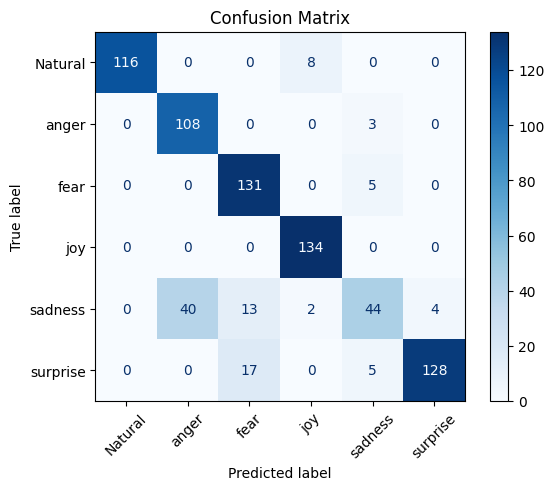

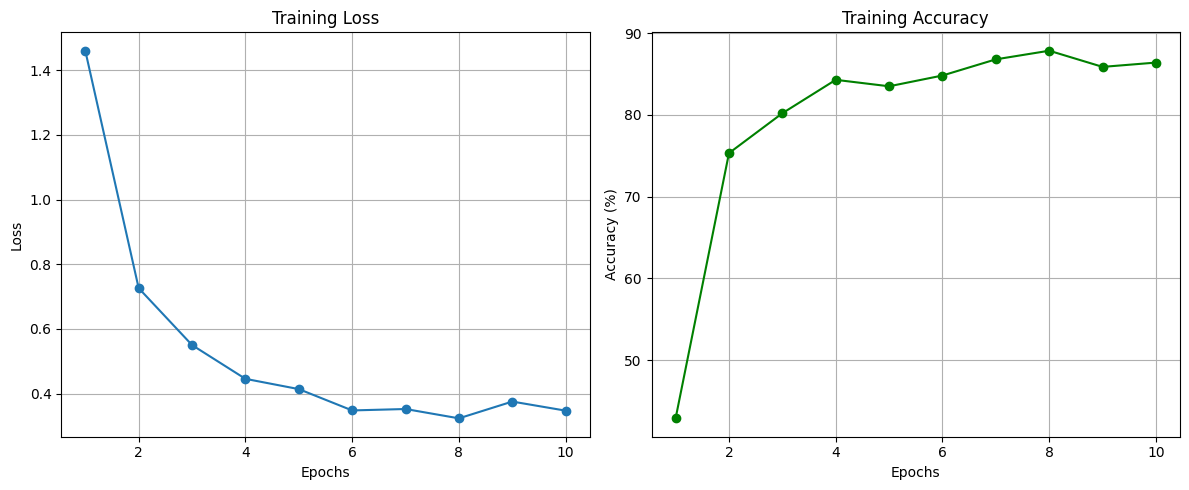

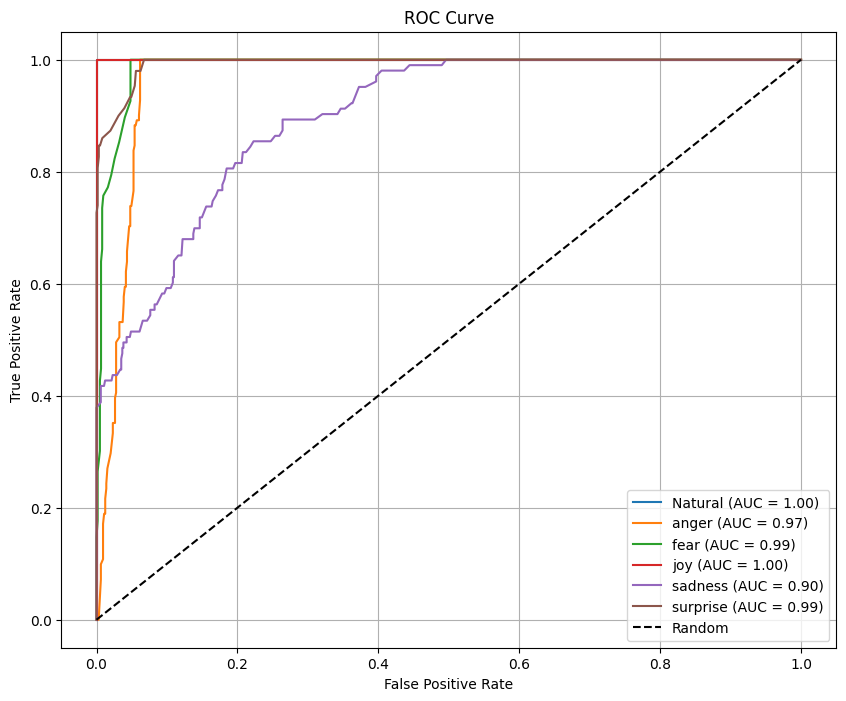

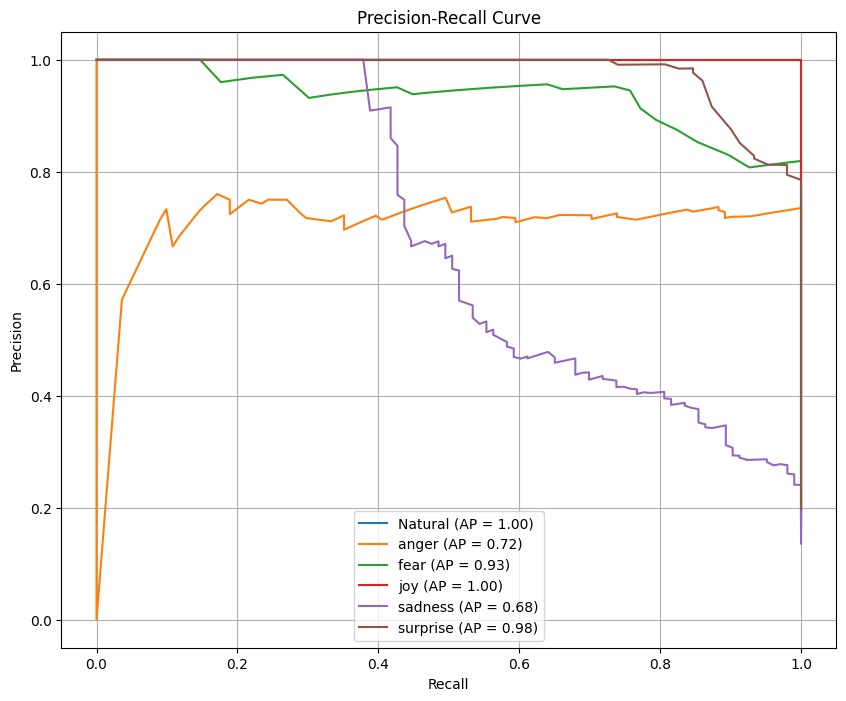

In [ ]:
# 📌 Import libraries
import os
import torch
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, WeightedRandomSampler
import torch.nn as nn
import torch.optim as optim

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize

import matplotlib.pyplot as plt
import numpy as np
import collections

# 📌 Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 📌 Dataset path
data_dir = "/content/drive/MyDrive/Autistic Children Emotions - Dr. Fatma M. Talaat/Train"

# 📌 Image transformations for ViT
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

# 📌 Load dataset
train_dataset = datasets.ImageFolder(root=data_dir, transform=transform)
class_names = train_dataset.classes
print("Classes:", class_names)

# 📌 Balance dataset using WeightedRandomSampler
labels = [label for _, label in train_dataset.samples]
class_counts = collections.Counter(labels)
print("Class distribution:", class_counts)

class_weights = 1. / torch.tensor([class_counts[i] for i in range(len(class_names))], dtype=torch.float)
sample_weights = [class_weights[label] for label in labels]
sampler = WeightedRandomSampler(weights=sample_weights, num_samples=len(sample_weights), replacement=True)

train_loader = DataLoader(train_dataset, batch_size=32, sampler=sampler)

# 📌 Load pretrained Vision Transformer and modify the classification head
model = models.vit_b_16(pretrained=True)
in_features = model.heads[0].in_features
model.heads = nn.Sequential(nn.Linear(in_features, len(class_names)))
model = model.to(device)

# 📌 Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# 📌 Training loop
epochs = 10
train_loss_history = []
train_acc_history = []

for epoch in range(epochs):
    model.train()
    running_loss = 0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    epoch_loss = running_loss / len(train_loader)
    epoch_acc = 100 * correct / total
    train_loss_history.append(epoch_loss)
    train_acc_history.append(epoch_acc)

    print(f"Epoch {epoch+1}/{epochs} | Loss: {epoch_loss:.4f} | Accuracy: {epoch_acc:.2f}%")

# 📌 Evaluation
model.eval()
all_preds = []
all_labels = []
all_probs = []

with torch.no_grad():
    for images, labels in train_loader:
        images = images.to(device)
        outputs = model(images)
        probs = torch.softmax(outputs, dim=1)
        _, preds = torch.max(probs, 1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.numpy())
        all_probs.extend(probs.cpu().numpy())

# 📌 Classification report
print("\nClassification Report:")
print(classification_report(all_labels, all_preds, target_names=class_names))

# 📌 Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap="Blues", xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()

# 📌 Training Loss & Accuracy Plot
epochs_range = range(1, epochs + 1)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_loss_history, marker='o', label='Training Loss')
plt.title("Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_acc_history, marker='o', color='green', label='Training Accuracy')
plt.title("Training Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.grid(True)
plt.tight_layout()
plt.show()

# 📌 ROC and Precision-Recall Curves
y_true_bin = label_binarize(all_labels, classes=range(len(class_names)))
y_score = np.array(all_probs)

# ROC Curve
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(class_names)):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
for i in range(len(class_names)):
    plt.plot(fpr[i], tpr[i], label=f"{class_names[i]} (AUC = {roc_auc[i]:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

# Precision-Recall Curve
precision = dict()
recall = dict()
average_precision = dict()
for i in range(len(class_names)):
    precision[i], recall[i], _ = precision_recall_curve(y_true_bin[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(y_true_bin[:, i], y_score[:, i])

plt.figure(figsize=(10, 8))
for i in range(len(class_names)):
    plt.plot(recall[i], precision[i], label=f"{class_names[i]} (AP = {average_precision[i]:.2f})")
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.grid(True)
plt.show()
